<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/02_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Previous-> SUPERVISED algos. Supervised algo means that you know what the label is
# LABEL was Diagnosis! 
# when we don't know the label, then we can only CLASSIFY the points based on various factors,
# such as - are they kept next to each other? 
# UNSUPERVISED ALGOS-> no idea what the label is, just figure out if things could be kept
# together 



import pandas as pd
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,52,45,51,52,55,53,55,61,65,66,72,22],
    'y':[39, 35, 30, 52, 55, 53, 46, 55, 59, 63,70, 66,63,58,23,14,8,19,7,24]
})
# THIS IS THE ONLY DATA THAT WE HAVE-> there is no output or label to guide us 
# Hence, no xtrain,ytrain,xtest, ytest either!!! 


1) ASSUME k number of CENTROIDS. These centroids are the no. of clusters you want to divide your data into

2) RANDOMLY select k points from given dataset or you can even select your OWN random points 

3) CALCULATE DISTANCE of EVERY point from these centroids 

4) EACH point will be classified to the closest (NEAREST) CENTROID 

5) Is this the best answer? NO? [DISTANCE algorithms-> STD -> MIN STD for best algo]

6) MOVE THE CENTROIDS to their NEAREST NEIGHBOR

7) GO TO STEP 3 again. Keep repeating till all the points are visited or min STD achieved. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
# if you want to use iPython's matplotlib 
# inline -> use local definition not official python definition
# local definition-> Whatever Colab's iPython has decided
# here matplotlib is a HTML/CSS/JS library
# on local machine matplotlib is a C++ library 



In [6]:
# to ensure we get the same randomness everytime we run random functions, we will fix the seed
# for randomness -> random_state 
np.random.seed(42) # EVEN THO THERE IS RANDOMNESS -> SAME randomness is applied for all of us
k = 3 # ASSUMPTION 
centroids = {i+1:[np.random.randint(0,80),np.random.randint(0,80) ]  for i in range(k)} # (x,y)
centroids


{1: [51, 14], 2: [71, 60], 3: [20, 74]}

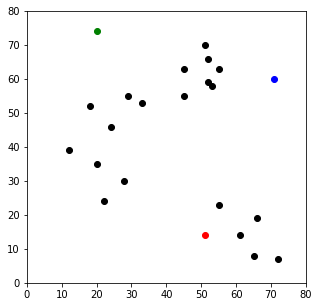

In [8]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k') # k means black 
# let's plot our centroids overlay on this scatter plot
color_dic = {1:'r', 2:'b', 3:'g'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=color_dic[i])
plt.xlim(0,80) # min and max of scale on x -axis
plt.ylim(0,80) # same as above on y axis
plt.show()

In [0]:
def Fit(df, centroids):
  for i in centroids.keys():
    # squared root distance formulae
    df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2))
  # create new cols for comparison of which distance is least
  # CALCULATE DISTANCE from each centroid, and CREATE a COLUMN out of it in DF
  centroid_new_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  # SELECT the column with SMALLEST DISTANCE -> IDXMIN --> Index of MINIMUM VALUE [ distance_from_1:10, distance_from_2:20, distance_from_3:15] -> distance_from_1
  df['closest'] = df.loc[:,centroid_new_cols].idxmin(axis=1) # axis=1, creating a new dimension in existing datafram
  # distance_from_3 was smalled value, and that has been entered as CLOSEST value
  # df['closest'] -> distance_from_3, distance_from_1 and so on
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # remove extra words and leave on centroid number
  # converting distance_from_3 to 3
  df['color'] = df['closest'].map(lambda x: color_dic[x])
  return df


In [12]:
df_modified = Fit(df, centroids)
df_modified.head(10)

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,46.324939,62.625873,35.902646,3,g
1,20,35,37.443290,56.797887,39.000000,1,r
2,28,30,28.017851,52.430907,44.721360,1,r
3,18,52,50.328918,53.600373,22.090722,3,g
4,29,55,46.529560,42.296572,21.023796,3,g
5,33,53,42.953463,38.639358,24.698178,3,g
6,24,46,41.868843,49.040799,28.284271,3,g
7,45,55,41.436699,26.476405,31.400637,2,b
8,52,59,45.011110,19.026298,35.341194,2,b
9,45,63,49.365980,26.172505,27.313001,2,b
